In [7]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [26]:
# analysis of tiny_test dataset

def analysis_tiny_dataset(df):
    # Calculate the number of sentences
    num_sentences = df['sentence_id'].nunique()

    # Identify the unique entities and their counts
    entity_tags = df[df['tags'] != 'O']['tags']
    entity_counts = Counter(entity_tags)

    # Identify the entities and their occurrences
    entities = df[df['tags'] != 'O'][['words', 'tags']]
    entity_list = entities.groupby('tags')['words'].apply(list).to_dict()

    # Print the analysis
    print(f'Number of sentences: {num_sentences}')
    print('Entity counts:')
    for entity, count in entity_counts.items():
        print(f'  {entity}: {count}')
    print('Entities and their occurrences:')
    for tag, words in entity_list.items():
        print(f'  {tag}: {words}')

In [27]:
df = pd.read_csv('tiny_test.csv')
analysis_tiny_dataset(df)

Number of sentences: 13
Entity counts:
  B-geo: 9
  B-per: 9
  I-per: 6
  B-org: 4
  I-geo: 6
Entities and their occurrences:
  B-geo: ['Barcelona', 'Barchelona', 'Parris', 'Paris', 'U.S.A', 'United', 'Saudi', 'Saudi', 'New']
  B-org: ['Microsoft', 'Microsoft', 'Apple', 'Microsoft']
  B-per: ['Jack', 'Jack', 'Bill', 'Steve', 'Bill', 'Steve', 'Robin', 'Alice', 'Henry']
  I-geo: ['States', 'of', 'America', 'Arabia', 'Arabia', 'York']
  I-per: ['London', 'London', 'gates', 'jobs', 'Gates', 'Jobs']


In [24]:
# analysis of train and test data

def analysis_train_test_data(train_df, test_df):

    # Calculate the number of sentences
    num_sentences_train = train_df['sentence_id'].nunique()
    num_sentences_test = test_df['sentence_id'].nunique()
    print(f'Number of sentences in train: {num_sentences_train}')
    print(f'Number of sentences in test: {num_sentences_test}')

    # Count the tags in train and test datasets, ignoring 'O' tags
    train_entity_counts = Counter(train_df[train_df['tags'] != 'O']['tags'])
    test_entity_counts = Counter(test_df[test_df['tags'] != 'O']['tags'])

    # Sort entity counts in descending order for consistency in both datasets
    sorted_train_counts = dict(sorted(train_entity_counts.items(), key=lambda item: item[1], reverse=True))
    sorted_test_counts = {tag: test_entity_counts.get(tag, 0) for tag in sorted_train_counts.keys()}

    print('Entity counts in train:')
    for entity, count in sorted_train_counts.items():
        print(f'  {entity}: {count}')

    print('Entity counts in test:')
    for entity, count in sorted_test_counts.items():
        print(f'  {entity}: {count}')

    # Prepare data for plotting
    tags = list(sorted_train_counts.keys())
    train_counts = [sorted_train_counts[tag] for tag in tags]
    test_counts = [sorted_test_counts[tag] for tag in tags]

    # Define colors for train and test bars
    train_color = 'blue'
    test_color = 'green'

    # Width of the bars
    bar_width = 0.4

    # Positions of the bars on the x-axis
    r1 = range(len(tags))
    r2 = [x + bar_width for x in r1]

    # Plotting the combined histogram
    plt.figure(figsize=(14, 8))
    plt.bar(r1, train_counts, color=train_color, width=bar_width, edgecolor='grey', label='Train Data')
    plt.bar(r2, test_counts, color=test_color, width=bar_width, edgecolor='grey', label='Test Data')

    # Add labels and title
    plt.xlabel('Entity Tags', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.title('Entity Tag Counts in Train and Test Data', fontweight='bold')
    plt.xticks([r + bar_width / 2 for r in range(len(tags))], tags, rotation=45)
    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

Number of sentences in train: 38366
Number of sentences in test: 38367
Entity counts in train:
  B-geo: 30113
  B-tim: 16317
  B-org: 16127
  I-per: 13845
  B-per: 13568
  I-org: 13526
  B-gpe: 12739
  I-geo: 5898
  I-tim: 5258
  B-art: 314
  B-eve: 244
  I-art: 242
  I-eve: 205
  I-gpe: 161
  B-nat: 157
  I-nat: 44
Entity counts in test:
  B-geo: 30114
  B-tim: 16131
  B-org: 16019
  I-per: 13830
  B-per: 13691
  I-org: 13281
  B-gpe: 12649
  I-geo: 5937
  I-tim: 5235
  B-art: 317
  B-eve: 243
  I-art: 221
  I-eve: 197
  I-gpe: 151
  B-nat: 175
  I-nat: 42


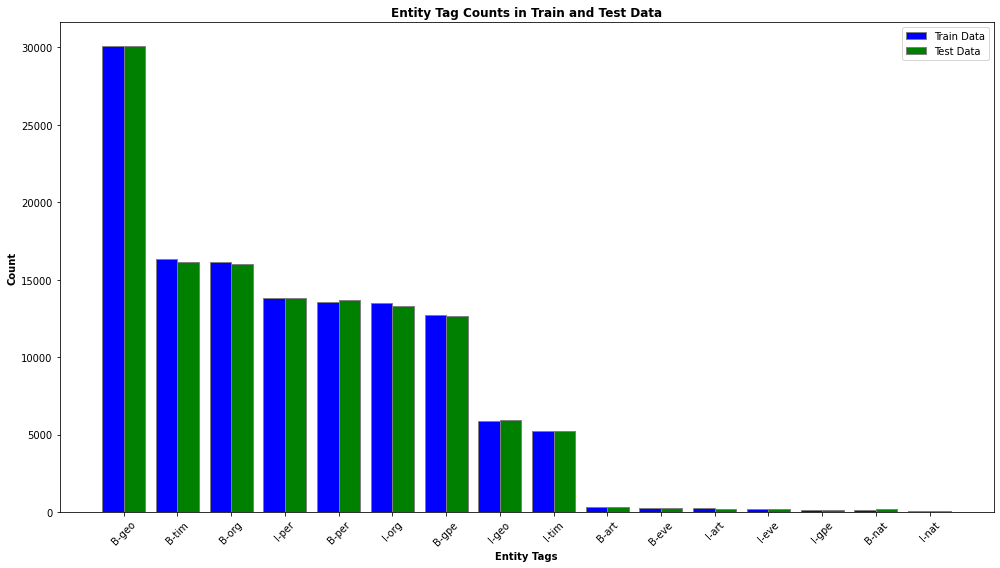

Entity counts in Train Data:
  B-geo: 30113
  B-tim: 16317
  B-org: 16127
  I-per: 13845
  B-per: 13568
  I-org: 13526
  B-gpe: 12739
  I-geo: 5898
  I-tim: 5258
  B-art: 314
  B-eve: 244
  I-art: 242
  I-eve: 205
  I-gpe: 161
  B-nat: 157
  I-nat: 44

Entity counts in Test Data:
  B-geo: 30114
  B-tim: 16131
  B-org: 16019
  I-per: 13830
  B-per: 13691
  I-org: 13281
  B-gpe: 12649
  I-geo: 5937
  I-tim: 5235
  B-art: 317
  B-eve: 243
  I-art: 221
  I-eve: 197
  I-gpe: 151
  B-nat: 175
  I-nat: 42


In [25]:
train_df = pd.read_csv('train_data_ner.csv')
test_df = pd.read_csv('test_data_ner.csv')

analysis_train_test_data(train_df, test_df)